## Do new balls give an advantage to the server.

In [1]:
import pandas as pd
import numpy as np


!git clone https://github.com/JeffSackmann/tennis_pointbypoint


Cloning into 'tennis_pointbypoint'...
remote: Enumerating objects: 150, done.
remote: Total 150 (delta 0), reused 0 (delta 0), pack-reused 150
Receiving objects: 100% (150/150), 14.38 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
df = pd.read_csv('tennis_pointbypoint/pbp_matches_atp_main_archive.csv')
c_df = pd.read_csv('tennis_pointbypoint/pbp_matches_ch_main_archive.csv')
df = df.append(c_df)

#### Split every match into games using ";" which is the game separator. Then calculate service points won in every game. Points won by the server are S and A, points won by the receiver are R and D

In [41]:

results = []
game_index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
for gi in game_index:
    won = []
    for row in df.itertuples():
        match = row.pbp
        try:
            spw = match.split(';')[gi].count('S') + match.split(';')[gi].count('A') 
            rpw = match.split(';')[gi].count('R') + match.split(';')[gi].count('D')
        except Exception as e:
            pass
            #print(e, match.split(';')[gi])
        won.append(spw / (spw + rpw))
    results.append((gi, np.array(won).mean()))

In [42]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


### Shift the game numbers so we aren't 0-indexed.

In [52]:
game_serve = pd.DataFrame(results)
game_serve.columns = ['game', 'spw']
game_serve['game_no'] = game_serve['game'].shift(-1)

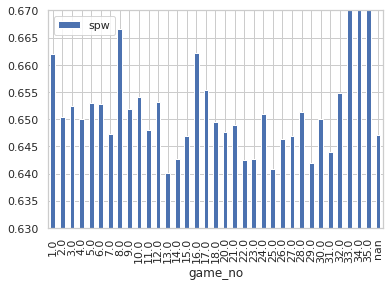

In [53]:
game_serve.plot.bar(x = 'game_no', y = 'spw', ylim=(0.63,0.67))

### New balls are initially after 7 games, then every 9 games. 

In [54]:
# So that means game 1, then after 7 games which mean game 8 starts with new balls. Then after than game 17, 26, 35

In [55]:
game_serve['new_balls'] = 0
game_serve.loc[game_serve.game_no.isin([1,8,17,26,35]), 'new_balls'] = 1.

(0.62, 0.69)

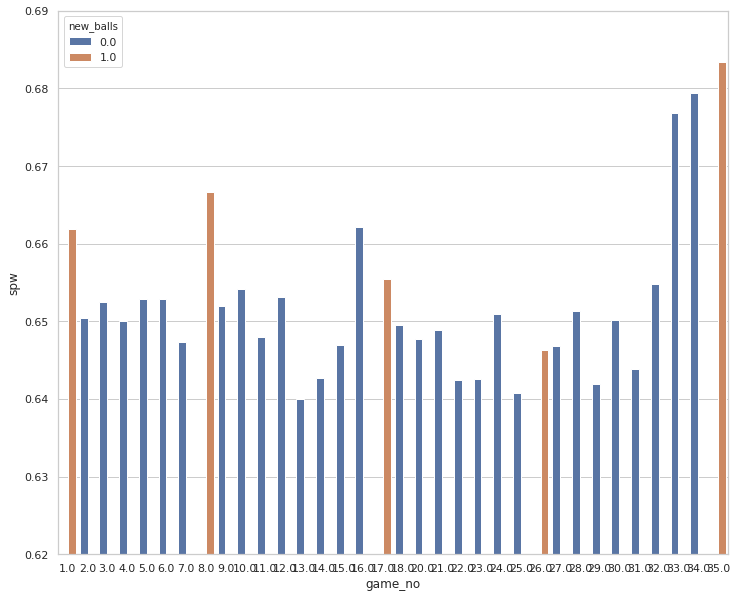

In [56]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (12,10))
s = sns.barplot(x='game_no', y='spw', data=game_serve, hue='new_balls')
axes = s.axes
axes.set_ylim(0.62,0.69)


In [51]:
game_serve.groupby('new_balls')['spw'].mean()

new_balls
0.0    0.650679
1.0    0.662722
Name: spw, dtype: float64